In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [2]:
%matplotlib inline


In [3]:
pd.set_option('display.max_columns', None)

# Reading the data

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.shape

(6819, 96)

In [6]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [7]:
df.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6819
 Interest Coverage Ratio (Interest expense to EBIT)         6819
 Net Income Flag                                            6819
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [8]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


## Filtering the categories of the dependent variable

In [11]:
df['Bankrupt?'].value_counts()


0    6599
1     220
Name: Bankrupt?, dtype: int64

In [12]:
Bankrupcies = df[(df['Bankrupt?'] == 1)]

In [13]:
No_bankrupcies =  df[(df['Bankrupt?'] == 0)]

In [14]:
Bankrupcies.shape

(220, 96)

In [15]:
No_bankrupcies.shape

(6599, 96)

In [16]:
Bankrupcies.sample(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2441,1,0.361527,0.408308,0.402056,0.602034,0.602034,0.998996,0.796316,0.808291,0.301594,0.780467,1.084670e-04,0.000000e+00,0.463766,0.000600,0.000000,0.196325,0.196325,0.196325,0.101825,0.321603,0.023035,0.098933,0.081720,0.022115,0.848075,0.682868,0.682868,0.216912,5.680000e+09,0.000342,0.262246,0.378255,0.002706,0.002834,0.630555,0.017743,0.195786,0.804214,0.004837,0.374113,0.005366,0.098955,0.080650,0.395684,0.043478,0.001254,0.005040,1.910000e+07,2.950000e+09,0.019677,0.005341,0.392551,0.023277,0.727340,0.074707,0.071571,0.025363,0.002845,0.002695,0.049575,0.342389,0.276975,0.000000,0.231983,0.729111,0.330031,0.000000,0.912302,0.001986,0.053486,5.660000e+09,6.540000e+09,0.593862,6.000000e+09,0.671490,0.802943,0.231983,0.330031,0.110933,0.597761,0.453353,0.575536,0.302214,0.100665,0,0.719603,0.005470,0.620878,0.602035,0.829667,0.287647,0.026773,0.565073,1,0.017698
4787,1,0.455809,0.493404,0.504684,0.596600,0.596600,0.998944,0.797233,0.809159,0.303303,0.781413,7.300000e+09,4.190000e+08,0.465940,0.000380,0.000000,0.192280,0.192280,0.192280,0.176988,0.330021,0.055674,0.090954,0.140468,0.022007,0.847747,0.689263,0.689267,0.217583,4.860000e+09,0.000394,0.263822,0.384188,0.007409,0.003693,0.629631,0.016596,0.191251,0.808749,0.005047,0.386359,0.005366,0.090902,0.139454,0.402765,0.109445,0.001491,0.004242,7.430000e+0

In [17]:
df[' Net Income Flag'].value_counts()


1    6819
Name:  Net Income Flag, dtype: int64

## Selecting features 

### Correlations matrix

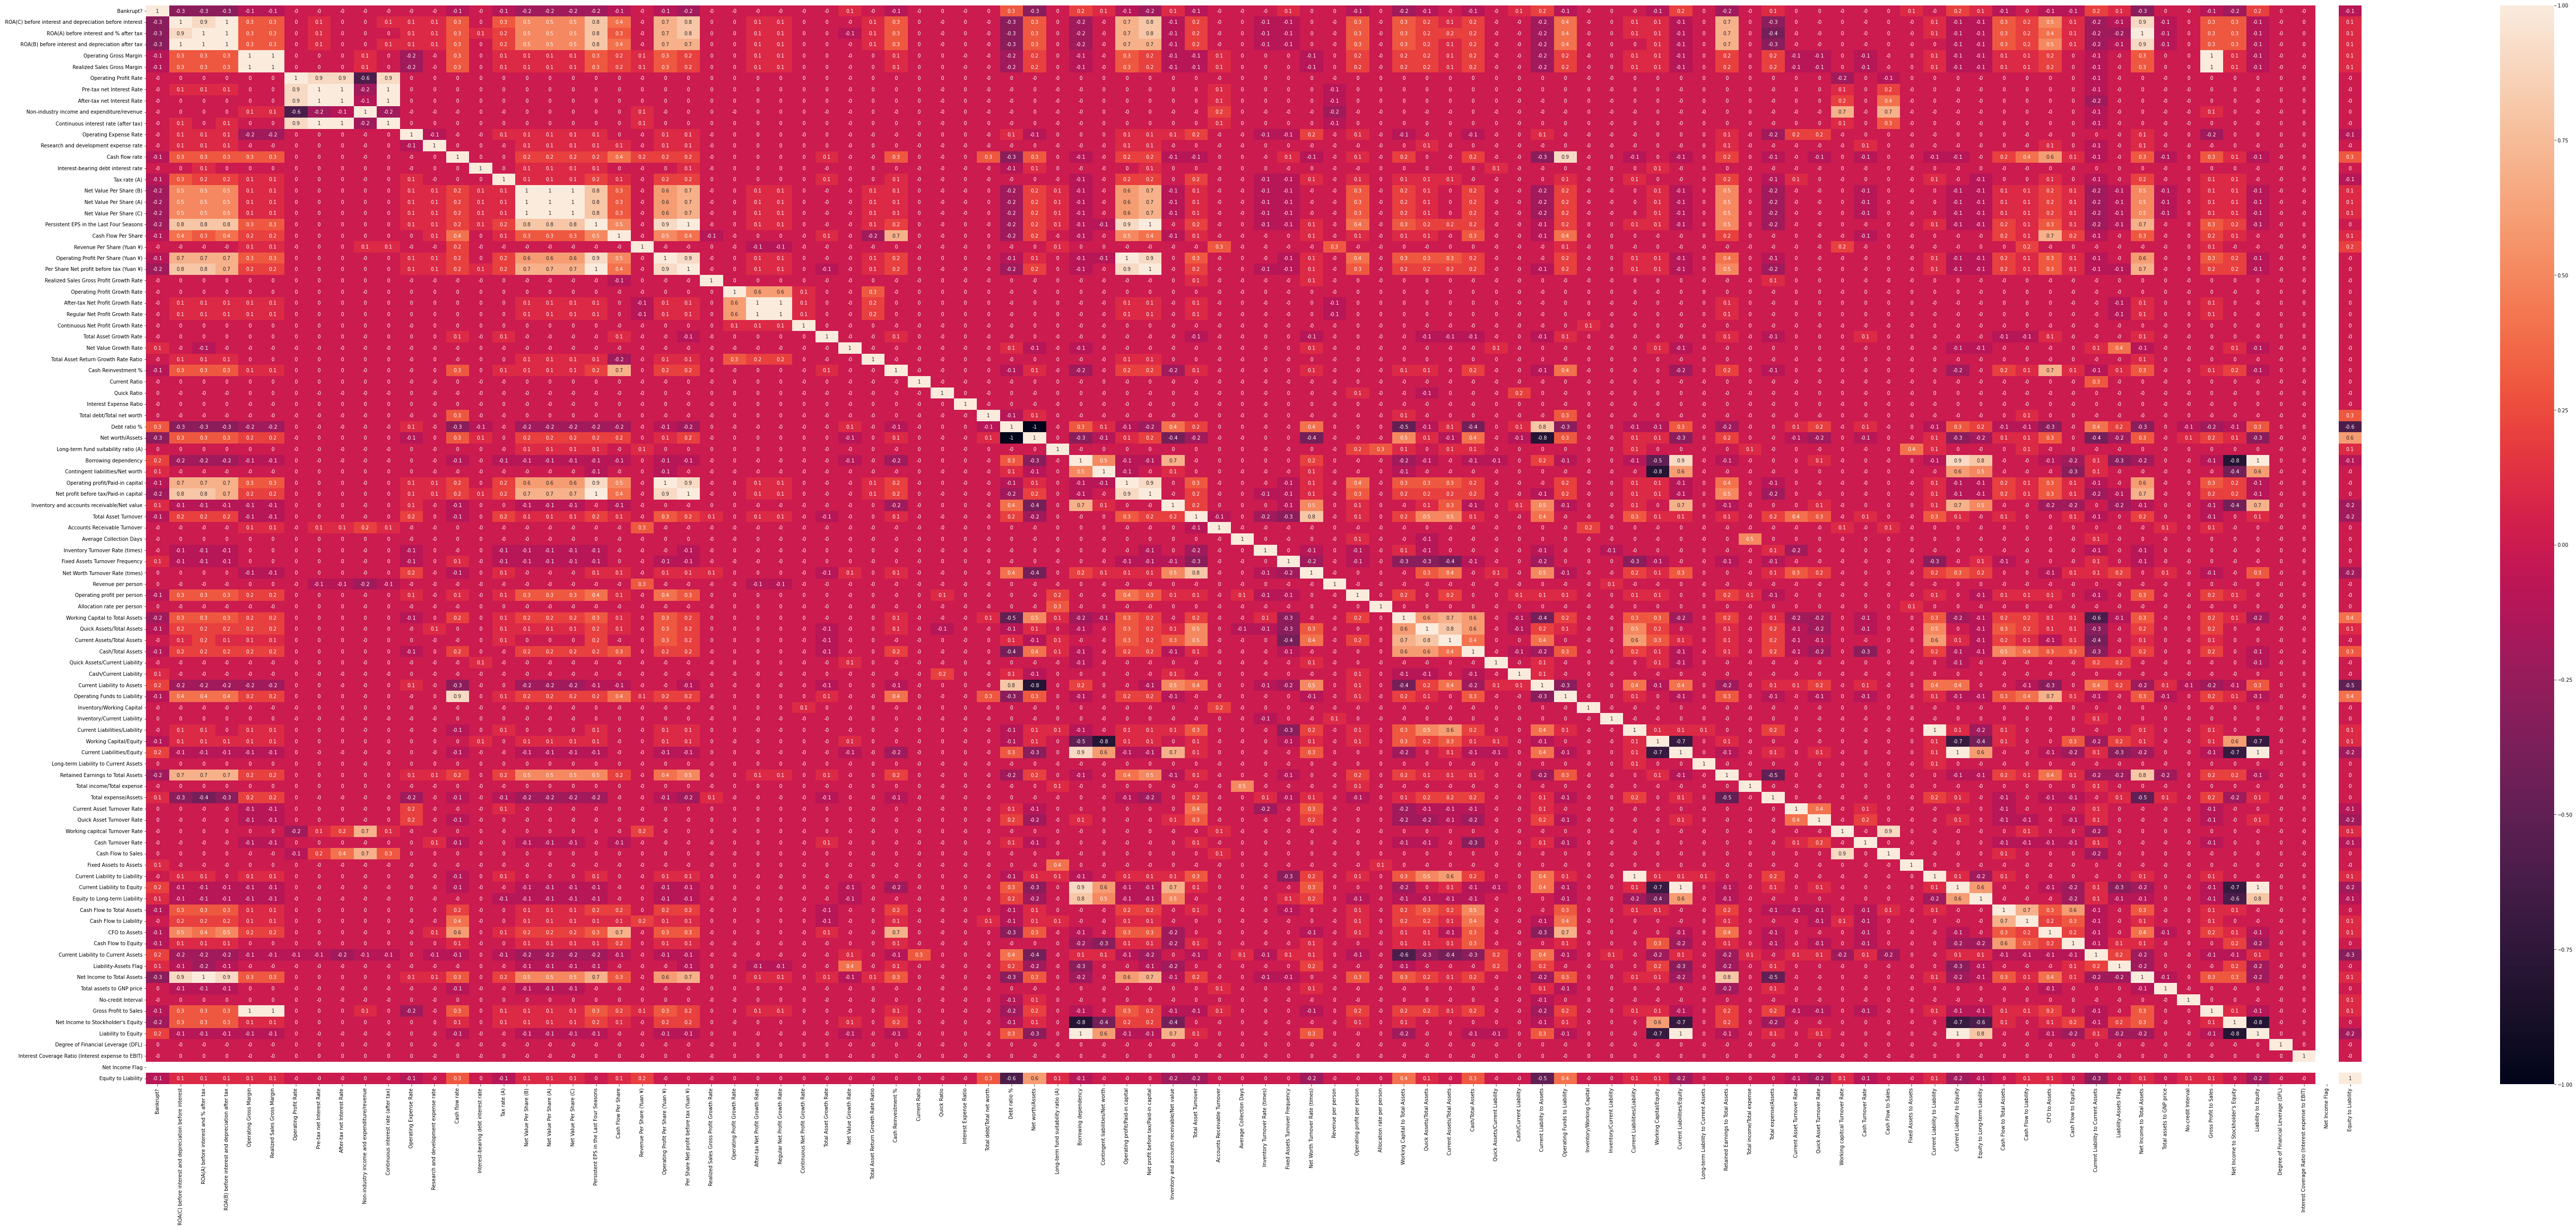

In [18]:
correlations_matrix = df.corr().round(1)

fig, axs = plt.subplots(1, sharex=True, figsize=(100, 40))
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [19]:
correl = [(item[1], item[0]) for item in list(abs(correlations_matrix['Bankrupt?']).items())]
correl.sort(reverse=True)
correl

[(1.0, 'Bankrupt?'),
 (0.3, ' ROA(C) before interest and depreciation before interest'),
 (0.3, ' ROA(B) before interest and depreciation after tax'),
 (0.3, ' ROA(A) before interest and % after tax'),
 (0.3, ' Net worth/Assets'),
 (0.3, ' Net Income to Total Assets'),
 (0.3, ' Debt ratio %'),
 (0.2, ' Working Capital to Total Assets'),
 (0.2, ' Retained Earnings to Total Assets'),
 (0.2, ' Persistent EPS in the Last Four Seasons'),
 (0.2, ' Per Share Net profit before tax (Yuan ¥)'),
 (0.2, ' Net profit before tax/Paid-in capital'),
 (0.2, ' Net Value Per Share (C)'),
 (0.2, ' Net Value Per Share (B)'),
 (0.2, ' Net Value Per Share (A)'),
 (0.2, " Net Income to Stockholder's Equity"),
 (0.2, ' Liability to Equity'),
 (0.2, ' Current Liability to Equity'),
 (0.2, ' Current Liability to Current Assets'),
 (0.2, ' Current Liability to Assets'),
 (0.2, ' Current Liabilities/Equity'),
 (0.2, ' Borrowing dependency'),
 (0.1, ' Working Capital/Equity'),
 (0.1, ' Total expense/Assets'),
 (0.1

In [20]:
corr_limit = 0.05

In [21]:
CorrFilter = correlations_matrix[correlations_matrix['Bankrupt?'] >= corr_limit]
filterdCorrCols = list(CorrFilter.index)
filterdCorrCols

['Bankrupt?',
 ' Net Value Growth Rate',
 ' Debt ratio %',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Inventory and accounts receivable/Net value',
 ' Fixed Assets Turnover Frequency',
 ' Cash/Current Liability',
 ' Current Liability to Assets',
 ' Current Liabilities/Equity',
 ' Total expense/Assets',
 ' Fixed Assets to Assets',
 ' Current Liability to Equity',
 ' Equity to Long-term Liability',
 ' Current Liability to Current Assets',
 ' Liability-Assets Flag',
 ' Liability to Equity']

### Separating the dependent and independent variables

In [22]:
X = df.drop(['Bankrupt?'], axis = 1)
y = df['Bankrupt?']

### Variance threshold method

In [23]:
X1 = X.copy()

In [24]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))
sel = sel.fit(X1)
temp = sel.transform(X1)
temp_df = pd.DataFrame(temp)
print(X1.shape)
print(temp_df.shape)

(6819, 95)
(6819, 28)


In [25]:
list(sel.get_feature_names_out())

[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Total Assets',
 ' Current Assets/Total Assets',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 ' Current Liability to Liability',
 ' Total assets to GNP price']

 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 #' Tax rate (A)',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 #' Debt ratio %',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 #' Cash/Total Assets',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 #' Liability-Assets Flag',
 ' Total assets to GNP price']

Similar results from k-best features and variance threshold. #are the columns present in k-best and not in variance threshold. 

### Selecting the k-best features

In [26]:
X2=X.copy()

In [27]:

from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(chi2, k='all') # Here we choose 10 best features so that is easier to analyze results later
kbest.fit(X2,y)
X_new = kbest.transform(X2) 
selected_columns = [X2.columns[index] for index, value in enumerate(kbest.get_support().tolist()) if value == True]
selected = pd.DataFrame(X_new, columns = selected_columns)
selected.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.39159

In [30]:
ml = [elem for elem in zip(kbest.scores_, X2.columns.tolist())]
ml.sort(reverse=True)
scores = pd.DataFrame(data = ml, columns = ['score','Column'])
scores.head(15)

,score,Column
0,2.901545e+11,Cash/Current Liability
1,2.495621e+11,Fixed Assets to Assets
2,2.421293e+11,Net Value Growth Rate
3,2.200229e+11,Fixed Assets Turnover Frequency
4,8.633138e+10,Revenue per person
5,6.391313e+10,Total assets to GNP price
6,3.059892e+10,Quick Ratio
7,2.391564e+10,Quick Asset Turnover Rate
8,2.051825e+10,Total Asset Growth Rate
9,1.385736e+10,Research and development expense rate


In [ ]:
list(selected.columns)

### Variance Inflation Factor

In [ ]:
X3=X.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

threshold = 4
max_value = 10
while (max_value > threshold):

# VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X3.columns

# calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(len(X3.columns))]    
    vif_data.sort_values(by="VIF", ascending = False, inplace = True)
    
    max_value = vif_data.iloc[0,1]    
    if ( max_value > threshold ):
        col_to_drop = vif_data["feature"].loc[0]
        X3.drop(columns=col_to_drop,axis=1,inplace=True)
        vif_data.drop([0],axis=0,inplace=True)

print(vif_data)

# R2 -> VIF = 1/(1-R2). R2=0.85 -> VIF(1/1-0.85) = 1/ 0.15 = 6.65


$$ VIF = 5 = /(1-R2 )$$
$$ 5(1-R2) = 1 $$
$$ 5 -5R2 = 1 $$
$$ 4 = 5R2 $$
$$ R2 = 4/5 = 0.8 $$

$$R2 = 1- \frac[\sum_[i](y_[i]-y_pred_[yi])^2]/[\sum_[i](y_[i]-mean(y))^2]$$

In [ ]:
columns_list = list(vif_data[vif_data.VIF < 5].feature)

In [ ]:
X3.columns

In [ ]:
X3[columns_list]

### Recursive Feature Elimination

scaler = StandardScaler()
scaler.fit(X3)
scaler.transform(X3)
X3_sc = pd.DataFrame(scaler.transform(X3), columns=X3.columns)

In [ ]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=28, verbose=False)
rfe.fit(X, y)

In [ ]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df_RFE = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
#pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df_RFE['Column_name'] = pd.DataFrame(X).columns
#df.head()
df_RFE[df_RFE['Rank']==1]

## Principal Components Analysis

### Singular Value Decomposition on the whole data set

In [ ]:
X4 = X.copy()

In [ ]:
scaler = StandardScaler()
scaler.fit(X4)
X_st = pd.DataFrame(scaler.transform(X4), columns=X4.columns)



In [ ]:
X_st.describe().T

In [ ]:
pca = PCA(random_state=5)
pca.fit(X_st)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

In [ ]:
PC_values = np.arange(pca.n_components_) +1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.rcParams['figure.figsize'] = [15, 10]

plt.show()

In [ ]:
variance_acc = pd.Series(pca.explained_variance_ratio_.cumsum()) 
print (variance_acc)

In [ ]:
plt.bar(range(len(variance_acc)), variance_acc, color='royalblue' )
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.2, axis='y' )
plt.xticks(range(len(variance_acc)))
plt.xlabel('PCA')
plt.ylabel('Expl_var_ratio_accum')
plt.title('Accummulated explained variance ratio')
plt.rcParams['figure.figsize'] = [15, 10]


plt.show()

### Singular Value Decomposition on the variables selected by the variance threshold

In [ ]:
scaler = StandardScaler()
scaler.fit(temp_df)
scaler.transform(temp_df)
X_temp = pd.DataFrame(scaler.transform(temp_df), columns=temp_df.columns)

In [ ]:
pca = PCA(random_state=5)
pca.fit(temp_df)

print(pca.explained_variance_ratio_)

X_pca = pd.DataFrame(pca.transform(temp_df)).iloc[:,0:8]

In [ ]:
PC_values = np.arange(pca.n_components_) +1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
variance_acc_temp = pd.Series(pca.explained_variance_ratio_.cumsum()) 
print (variance_acc_temp)

In [ ]:
plt.bar(range(len(variance_acc_temp)), variance_acc_temp, color='royalblue' )
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.2, axis='y' )
plt.xticks(range(len(variance_acc_temp)))
plt.xlabel('PCA')
plt.ylabel('Expl_var_ratio_accum')
plt.title('Accummulated explained variance ratio')
plt.rcParams['figure.figsize'] = [15, 10]


plt.show()

In [ ]:
PCA0 = b00 * col0 + b01 * col1 + ....+ b085 * col95
eigen_vector1 = (b00, b01, b02,...)
eigen_value = vancianza
PCA.components_

### T-distributed Stochastic Neighbor Embedding, TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
X_embedded.shape


# Upsampling the minority class

In [ ]:
df_1 = pd.concat([X_pca, y], axis=1)
df_1

In [ ]:
upsample_indexes = np.random.choice(df_1[df_1["Bankrupt?"]==1].index, size = 400, replace=True).tolist()
upsample = df_1.iloc[upsample_indexes,:]

In [ ]:
upsample = df_1.iloc[upsample_indexes,:]
upsample

# Clustering to downsize the majority class

In [ ]:
No_bankrupcies =  df_1[(df_1['Bankrupt?'] == 0)]

In [ ]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(No_bankrupcies)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(No_bankrupcies, kmeans.predict(No_bankrupcies)))

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(No_bankrupcies)

In [ ]:
clusters = kmeans.predict(No_bankrupcies)

elem_in_cluster = pd.Series(clusters).value_counts().sort_index() # Number of values in each cluster
elem_in_cluster

In [ ]:
clusters_weight = []
for j in range(len(elem_in_cluster)):
    weight = elem_in_cluster[j]/len(No_bankrupcies)
    clusters_weight.append(weight)

In [ ]:
elem_in_cluster/len(No_bankrupcies)

In [ ]:
No_bankrupcies["cluster"] = clusters

No_bankrupcies

In [ ]:
final_df = pd.concat([new_No_bankrupcies, df_1[df_1["Bankrupt?"]==1]], axis=0)

final_df = final_df.sort_index()

final_df.head()

In [ ]:
final1_df = pd.concat([new_No_bankrupcies, upsample], axis=0)

final1_df = final1_df.sort_index()

final1_df.sample(30)

In [ ]:
final1_df.shape

# Predicting with different models

In [ ]:
y = final1_df['Bankrupt?'].astype('int')
X = final1_df.drop(['Bankrupt?'], axis=1)

### Logistic regression

In [ ]:
classification = LogisticRegression(random_state=0, solver='lbfgs')
classification.fit(X_train, y_train)
y_train_pred = classification.predict(X_train)

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred)

In [ ]:
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

In [ ]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))

In [ ]:
print(classification_report(y_train, y_train_pred,target_names=['0','1']))

In [ ]:
y_test_pred = classification.predict(X_test)

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)

In [ ]:
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

print("The accuracy in the TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

print(classification_report(y_test, y_test_pred,target_names=['0','1']))

### KNN classifier

In [ ]:
# entrenar distintos modelos con distintos valores de k
K = range(2, 14)
accuracies = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    ypred_train = knn.predict(X_train)
    accuracies.append(accuracy_score(y_train, ypred_train))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(k, accuracy_score(y_train, ypred_train)))   

In [ ]:
K = range(2,14)
accuracies = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_test, y_test)
    ypred_test = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, ypred_test))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(k, accuracy_score(y_test, ypred_test)))

### Random forest 

In [ ]:
clf = RandomForestClassifier(max_depth=9,
                             min_samples_split=6,
                             min_samples_leaf =3,
                             max_samples=0.8)
                             #random_state = 42)
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [5,7,9,11] 
min_samples_split_choices = [2,4,6,8,9]  
min_samples_leaf_choices = [1,3] 
max_samples=[0.8,0.5]
n_jobs = [-1]

grid = {'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_samples':max_samples,
        'n_jobs':n_jobs}

model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5) 
grid_search.fit(X_train, y_train)
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
clf = RandomForestClassifier(max_depth= 11,
                             min_samples_split=2,
                             min_samples_leaf =1,
                             max_samples=0.8, n_jobs= -1)
                             #random_state = 42)
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))


